In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/Users/jhajhajhajha1/Desktop/Hanyang Data/data_playaround.csv')

In [3]:
data = dataset.iloc[:, 0:19]

In [4]:
print(len(data))
data[1000:1010]

46858


,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,house_lat,house_lon,work_lat,work_lon,H_ZONE,H_ZONE_X,H_ZONE_Y,W_ZONE_X,W_ZONE_Y,0
1000,88,4.0,3.0,1.0,5.0,1.0,40.0,1.0,4.0,37.511534,126.902390,37.031954,127.077127,954.0,191000.0,445000.0,207000.0,393000.0,25940.567472
1001,88,3.0,3.0,4.0,2.0,2.0,61.0,1.0,6.0,37.000396,127.106922,37.034933,127.078710,50.0,209000.0,389000.0,207000.0,393000.0,25940.567472
1002,88,5.0,3.0,1.0,4.0,1.0,46.0,1.0,4.0,37.195733,127.034267,37.039019,127.077925,287.0,203000.0,411000.0,207000.0,393000.0,25940.567472
1003,88,4.0,4.0,2.0,6.0,1.0,49.0,1.0,6.0,37.067362,127.056343,37.037719,127.077653,130.0,205000.0,397000.0,207000.0,393000.0,25940.567472
1004,88,4.0,2.0,1.0,3.0,1.0,37.0,1.0,4.0,37.151695,127.078077,37.039019,127.077925,218.0,207000.0,405000.0,207000.0,393000.0,25940.567472
1005,88,3.0,3.0,1.0,5.0,1.0,56.0,1.0,6.0,37.053694,127.047655,37.038303,127.082699,105.0,205000.0,395000.0,207000.0,393000.0,25940.567472
1006,88,3.0,3.0,4.0,6.0,1.0,55.0,1.0,6.0,37.102160,127.021462,37.036618,127.077674,173.0,201000.0,401000.0,207000.0,393000.0,25940.567472
1007,88,4.0,4.0,2.0,5.0,1.0,41.0,1.0,6.0,37.037146,127.029241,37.035418,127.074294,86.0,203000.0,393000.0,207000.0,393000.0,25940.567472
1008,88,1.0,1.0,2.0,4.0,1.0,49.0,1.0,6.0,37.076516,127.064009,37.036774,127.072348,130.0,205000.0,397000.0,207000.0,393000.0,25940.567472
1009,88,3.0,3.0,1.0,5.0,1.0,43.0,1.0,6.0,36.989866,127.090719,37.037373,127.088846,35.0,209000.0,387000.0,207000.0,393000.0,25940.567472


In [5]:
# preprocessing

# not calculating distance, simply using latitude
x = data.iloc[:, 0:13]
x = x.drop(["house_lat", "house_lon"], axis= 1)
x.head()

,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,work_lat,work_lon
0,0,4.0,4.0,1.0,5.0,1.0,41.0,1.0,4.0,36.115620,126.792747
1,0,3.0,3.0,2.0,3.0,1.0,36.0,1.0,4.0,37.335447,126.677584
2,0,3.0,3.0,2.0,2.0,1.0,70.0,1.0,9.0,36.975082,127.436894
3,0,5.0,4.0,1.0,5.0,1.0,32.0,1.0,4.0,36.847868,127.414170
4,0,2.0,2.0,4.0,3.0,1.0,55.0,1.0,4.0,37.967527,124.717824


In [6]:
x.isnull().sum()

W_ZONE          0
no_hh         180
no_hh_chil    180
hh_type       180
hh_income     180
no_car        180
age           180
sex           180
job_type      180
work_lat      180
work_lon      180
dtype: int64

In [7]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(x.iloc[:, 1:10])
# x.iloc[:, 1:10] = imputer.transform(x.iloc[:, 1:10])
x = x.dropna()

In [8]:
x.isnull().sum()
x.groupby('hh_type').nunique()

,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,work_lat,work_lon
hh_type,,,,,,,,,,,
1.0,1326,8,8,1,8,2,66,2,9,15391,15422
2.0,732,7,7,1,8,2,62,2,8,3594,3605
3.0,648,6,6,1,8,2,58,2,9,3210,3214
4.0,1120,7,6,1,8,2,60,2,7,6152,6173
5.0,246,6,5,1,7,2,50,2,7,567,566
6.0,93,6,5,1,6,2,47,2,6,123,123


In [9]:
# save original data
x_original = x.values

In [10]:
# category values: hh_type, hh_income (this one is fine because of the levels)
# Encoding categorical data
# encode variable: hh_type, sex, job_type, W_Zone

# make X a numpy array of x
X_W = x.iloc[:, 0]
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# W_Zone
labelencoder_X_W = LabelEncoder()
X_W = labelencoder_X_W.fit_transform(X_W)
onehotencoder_X_W = OneHotEncoder(categorical_features = [0])
X_W = onehotencoder_X_W.fit_transform(X_W.reshape(-1, 1)).toarray()
# Dummy Variable trap
X_W = X_W[:, 1:]
# print(len(X_W[1]))

In [11]:
# hh_type
X_hh = x.iloc[:, 3]
labelencoder_X_hh = LabelEncoder()
X_hh = labelencoder_X_hh.fit_transform(X_hh)
onehotencoder_hh = OneHotEncoder(categorical_features = [0])
X_hh = onehotencoder_hh.fit_transform(X_hh.reshape(-1, 1)).toarray()
# Dummy Variable trap
X_hh = X_hh[:, 1:]

In [12]:
# job_type
X_job = x.iloc[:, 8]
labelencoder_X_job = LabelEncoder()
X_job = labelencoder_X_job.fit_transform(X_job)
onehotencoder_X_job = OneHotEncoder(categorical_features = [0])
X_job = onehotencoder_X_job.fit_transform(X_job.reshape(-1, 1)).toarray()
# Dummy Variable trap
X_job = X_job[:, 1:]

In [13]:
# add the variables: 
X = x.values
# for i, x1 in enumerate(X[0]):
#     print("column %s" %i, x1)
# take out the three columns
X = np.delete(X, 0, axis = 1)
X = np.delete(X, 2, axis = 1)
X = np.delete(X, 6, axis = 1)
X = np.append(X, X_W, axis = 1)
X = np.append(X, X_hh, axis = 1)
X = np.append(X, X_job, axis = 1)


In [14]:
'''
Summary:
column 0: no_hh
column 1: no_hh_chil
column 2: hh_income
column 3: no_car
column 4: age
column 5: sex
column 6: work_lat
column 7: work_lon
column 8~1570: W_ZONE
column 1571~1575: hh_type
column 1576~1584: job_type

'''

'\nSummary:\ncolumn 0: no_hh\ncolumn 1: no_hh_chil\ncolumn 2: hh_income\ncolumn 3: no_car\ncolumn 4: age\ncolumn 5: sex\ncolumn 6: work_lat\ncolumn 7: work_lon\ncolumn 8~1570: W_ZONE\ncolumn 1571~1575: hh_type\ncolumn 1576~1584: job_type\n\n'

In [15]:
# Higher Dimensions
# higher dimensions for continuous variables: hh_income, age, no_car, no_hh
from sklearn.preprocessing import PolynomialFeatures

# no_hh
X_no_hh = X[:, 0]
poly_reg_no_hh = PolynomialFeatures(degree = 4)
X_no_hh = poly_reg_no_hh.fit_transform(X_no_hh.reshape(-1, 1))
X_no_hh = np.delete(X_no_hh, 0, axis = 1)
X_no_hh = np.delete(X_no_hh, 0, axis = 1)

X = np.append(X, X_no_hh, axis = 1)


In [16]:

'''
column 1585~1587: poly no_hh
'''

'\ncolumn 1585~1587: poly no_hh\n'

In [17]:
# hh_income
X_hh_income = X[:, 2]
poly_reg_hh_income = PolynomialFeatures(degree = 4)
X_hh_income = poly_reg_hh_income.fit_transform(X_hh_income.reshape(-1, 1))
X_hh_income = np.delete(X_hh_income, 0, axis = 1)
X_hh_income = np.delete(X_hh_income, 0, axis = 1)

X = np.append(X, X_hh_income, axis = 1)



In [18]:
'''
column 1588~1590: poly hh_income
'''

'\ncolumn 1588~1590: poly hh_income\n'

In [19]:
# age
X_age = X[:, 4]
poly_reg_age = PolynomialFeatures(degree = 4)
X_age = poly_reg_age.fit_transform(X_age.reshape(-1, 1))
X_age = np.delete(X_age, 0, axis = 1)
X_age = np.delete(X_age, 0, axis = 1)

X = np.append(X, X_age, axis = 1)



In [20]:
'''
column 1591~1593: poly X_age
'''

'\ncolumn 1591~1593: poly X_age\n'

In [21]:
# no_car
X_no_car = X[:, 3]
poly_reg_car = PolynomialFeatures(degree = 4)
X_no_car = poly_reg_car.fit_transform(X_no_car.reshape(-1, 1))
X_no_car = np.delete(X_no_car, 0, axis = 1)
X_no_car = np.delete(X_no_car, 0, axis = 1)

X = np.append(X, X_no_car, axis = 1)

In [22]:
'''
column 1594~1596: poly X_age
'''

'\ncolumn 1594~1596: poly X_age\n'

In [23]:
y = data.loc[:, ["house_lat", "house_lon"]]
y.head()

,house_lat,house_lon
0,37.453952,126.716877
1,37.465845,126.717234
2,37.229621,127.284122
3,37.623500,127.083187
4,37.469676,126.644354


In [24]:
y.isnull().sum()

house_lat    180
house_lon    180
dtype: int64

In [25]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(y)
# y = imputer.transform(y)
y = y.dropna()
Y = y.values

In [26]:
# Splitting the dataset into the Training set and Test set (original dataset for random forest and SVM)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_original, Y, test_size = 0.2, random_state = 0)

In [27]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Normalization
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [28]:
# Random Forest Regression
# Fitting the Random Forest Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
prediction = pd.DataFrame({'house_lat': y_test[:, 0],'house_lon':y_test[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [31]:
# accuracy based on distance
def accuracy(pred):
    sum_error = 0
    for i in range(len(pred)):
        deltax = pred.iloc[i][0]-pred.iloc[i][2]
        deltay = pred.iloc[i][1]-pred.iloc[i][3]
        error = (deltax**2 + deltay**2)**(0.5)
        sum_error += error
    return sum_error

def ind_diff(pred):
    diff = []
    for i in range(len(pred)):
        deltax = pred.iloc[i][0]-pred.iloc[i][2]
        deltay = pred.iloc[i][1]-pred.iloc[i][3]
        error = (deltax**2 + deltay**2)**(0.5)
        diff.append(error)
    return pd.DataFrame({'Difference': diff})


In [32]:
accuracy(prediction)

836.4854723538451

In [33]:
difference = ind_diff(prediction)

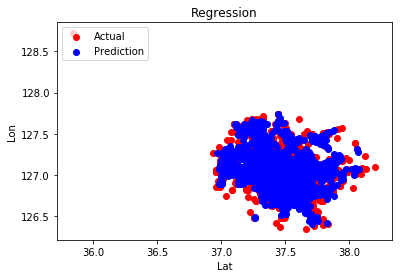

In [34]:
plt.scatter(y_test[:, 0], y_test[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [35]:
# SVR
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

Svr = SVR(kernel = 'rbf')
regressor = MultiOutputRegressor(Svr)
regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
           n_jobs=1)

In [36]:
y_pred = regressor.predict(X_test)

In [37]:
prediction = pd.DataFrame({'house_lat': y_test[:, 0],'house_lon':y_test[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [38]:
accuracy(prediction)

910.4894551538027

In [39]:
difference = ind_diff(prediction)

In [40]:
difference.head()

,Difference
0,0.136940
1,0.100117
2,0.046069
3,0.328629
4,0.223993


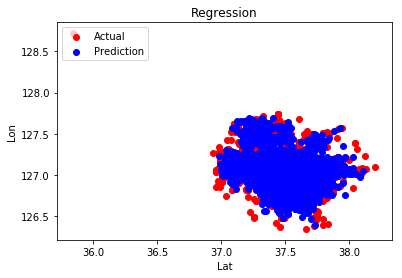

In [41]:
plt.scatter(y_test[:, 0], y_test[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [42]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [96]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1597)) #1597 for X and 11 for x_original
regressor.add(Dropout(0.25))

# Adding the second hidden layer
regressor.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(0.25))

# Adding the third hidden layer
regressor.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(0.25))

# Adding the output layer
regressor.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
sgd = keras.optimizers.SGD(lr=0.05, nesterov = True)
regressor.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mae'])
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                51136     
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 130       
Total para

In [97]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [98]:
Y_standardized = np.zeros((len(Y), 2))
Y_standardized[:,0] = (Y[:,0] - np.mean(Y[:,0]))/ np.std(Y[:,0])
Y_standardized[:,1] = (Y[:,1] - np.mean(Y[:,1]))/ np.std(Y[:,1])

In [99]:
# processed dataset with dummy variables and polynomials as well as standardized outcomes
X_train, X_test, y_train, y_test = train_test_split(X, Y_standardized, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [108]:
regressor.fit(X_train, y_train, batch_size = 64, epochs = 250)

Epoch 1/250
37342/37342 [==============================] - 1s 36us/step - loss: 0.2422 - mean_absolute_error: 0.3465
Epoch 2/250
37342/37342 [==============================] - 1s 32us/step - loss: 0.2418 - mean_absolute_error: 0.3468
Epoch 3/250
37342/37342 [==============================] - 1s 35us/step - loss: 0.2427 - mean_absolute_error: 0.3468
Epoch 4/250
37342/37342 [==============================] - 1s 34us/step - loss: 0.2435 - mean_absolute_error: 0.3480
Epoch 5/250
37342/37342 [==============================] - 1s 33us/step - loss: 0.2427 - mean_absolute_error: 0.3469
Epoch 6/250
37342/37342 [==============================] - 1s 33us/step - loss: 0.2428 - mean_absolute_error: 0.3478
Epoch 7/250
37342/37342 [==============================] - 1s 33us/step - loss: 0.2433 - mean_absolute_error: 0.3483
Epoch 8/250
37342/37342 [==============================] - 1s 34us/step - loss: 0.2424 - mean_absolute_error: 0.3471
Epoch 9/250
37342/37342 [==============================] - 1s 33

37342/37342 [==============================] - 1s 38us/step - loss: 0.2425 - mean_absolute_error: 0.3460
Epoch 71/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2392 - mean_absolute_error: 0.3452
Epoch 72/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2400 - mean_absolute_error: 0.3453
Epoch 73/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2397 - mean_absolute_error: 0.3452
Epoch 74/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2399 - mean_absolute_error: 0.3450
Epoch 75/250
37342/37342 [==============================] - 1s 39us/step - loss: 0.2386 - mean_absolute_error: 0.3441
Epoch 76/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2391 - mean_absolute_error: 0.3445
Epoch 77/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2386 - mean_absolute_error: 0.3438
Epoch 78/250
37342/37342 [==============================] - 1s 38us/s

37342/37342 [==============================] - 1s 38us/step - loss: 0.2378 - mean_absolute_error: 0.3439
Epoch 139/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2391 - mean_absolute_error: 0.3458
Epoch 140/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2380 - mean_absolute_error: 0.3440
Epoch 141/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2362 - mean_absolute_error: 0.3423
Epoch 142/250
37342/37342 [==============================] - 1s 39us/step - loss: 0.2365 - mean_absolute_error: 0.3428
Epoch 143/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2366 - mean_absolute_error: 0.3428
Epoch 144/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2387 - mean_absolute_error: 0.3449
Epoch 145/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2367 - mean_absolute_error: 0.3427
Epoch 146/250
37342/37342 [==============================] - 1

37342/37342 [==============================] - 1s 38us/step - loss: 0.2358 - mean_absolute_error: 0.3428
Epoch 207/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2353 - mean_absolute_error: 0.3416
Epoch 208/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2356 - mean_absolute_error: 0.3420
Epoch 209/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2366 - mean_absolute_error: 0.3434
Epoch 210/250
37342/37342 [==============================] - 1s 39us/step - loss: 0.2354 - mean_absolute_error: 0.3419
Epoch 211/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2345 - mean_absolute_error: 0.3417
Epoch 212/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2343 - mean_absolute_error: 0.3411
Epoch 213/250
37342/37342 [==============================] - 1s 38us/step - loss: 0.2342 - mean_absolute_error: 0.3411
Epoch 214/250
37342/37342 [==============================] - 1

In [101]:
y_pred = regressor.predict(X_test)

In [102]:
y_pred_new = np.zeros((len(y_pred), 2))
y_test_new = np.zeros((len(y_test), 2))
y_pred_new[:,0] = y_pred[:,0] * np.std(Y[:,0]) + np.mean(Y[:,0])
y_pred_new[:,1] = y_pred[:,1] * np.std(Y[:,1]) + np.mean(Y[:,1])

y_test_new[:,0] = y_test[:,0] * np.std(Y[:,0]) + np.mean(Y[:,0])
y_test_new[:,1] = y_test[:,1] * np.std(Y[:,1]) + np.mean(Y[:,1])
y_pred_new

array([[ 37.44112015, 127.45805359],
       [ 37.61040497, 127.05838013],
       [ 37.52433777, 127.00444031],
       ...,
       [ 37.56125641, 126.96965027],
       [ 37.57268143, 126.97666931],
       [ 37.43837357, 126.76522827]])

In [103]:
np.shape(X_test)

(9336, 1597)

In [104]:
prediction = pd.DataFrame({'house_lat': y_test_new[:, 0],'house_lon':y_test_new[:, 1],
                            'house_lat (pred)': y_pred_new[:,0], 'house_lon (pred)': y_pred_new[:,1]})

In [105]:
np.shape(y_pred)

(9336, 2)

In [106]:
# score to beat: 836.4854723538451
accuracy(prediction)

896.4017806636928

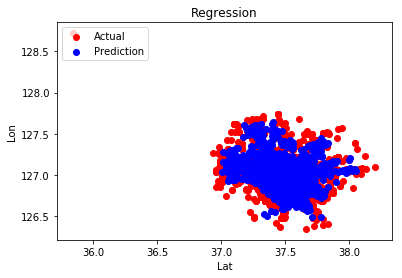

In [107]:
# plot
plt.scatter(y_test_new[:, 0], y_test_new[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred_new[:, 0], y_pred_new[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [93]:
# Grid Search
'''
Standard model:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1597))
regressor.add(Dropout(0.2))

# Adding the second hidden layer
regressor.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(0.2))

# Adding the third hidden layer
regressor.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
sgd = keras.optimizers.SGD(lr=0.1, nesterov = True)
regressor.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mae'])

'''
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

sgd = keras.optimizers.SGD(lr=0.1, nesterov = True)
def create_model():
    # create model
    regressor = Sequential()
    regressor.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1597))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'linear'))
    # Compile model
    regressor.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mae'])
    return regressor

In [96]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [82]:
# # PCA
# # Applying Kernel PCA
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(kernel = 'rbf')
# X_original_pca = kpca.fit_transform(x_original)
# X_original_pca

In [83]:
# # classification approach
# # x - same X except using W_Zone but no X_lat and X_lon, also eliminate non-independent variables
# # y - H_Zone
# x.head()

In [84]:
# x_cat = np.delete(X, 6, axis = 1)
# x_cat = np.delete(X, 7, axis = 1)

In [85]:
# Y_cat = data.loc[:, ["H_ZONE"]]
# Y_cat.head()
# Y_cat = Y_cat.dropna()

In [86]:
# from sklearn.preprocessing import LabelBinarizer
# binarizer = LabelBinarizer()
# Y_cat = binarizer.fit_transform(Y_cat.values)

In [87]:
# Y_cat

In [88]:
# X_train, X_test, y_train, y_test = train_test_split(x_cat, Y_cat, test_size = 0.2, random_state = 0)

In [89]:
# # Initialising the ANN
# classifier = Sequential()

# # Adding the input layer and the first hidden layer
# classifier.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 1596))
# classifier.add(Dropout(0.1))
# # Adding the second hidden layer
# classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(0.1))


# # Adding the output layer
# classifier.add(Dense(units = 1278, kernel_initializer = 'uniform', activation = 'sigmoid'))

# # Compiling the ANN
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



In [90]:
# # Fitting the ANN to the Training set
# classifier.fit(X_train, y_train, batch_size = 50, epochs = 10)

In [91]:
# y_pred = classifier.predict(X_test)